In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('predictores_nd.xlsx')
df.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
print(df.columns)

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')


In [ ]:
df['PERDIDA_SEGUIMIENTO_N'] = df['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
df_per = pd.DataFrame(df)
df_per.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO,PERDIDA_SEGUIMIENTO_N
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO,0
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO,0
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0


In [ ]:
categoric_columns = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns = list(df_per.columns)
numeric_columns = [i for i in columns if i not in categoric_columns]

In [ ]:
numeric_columns.remove('ID')
numeric_columns.remove('PERDIDA_SEGUIMIENTO')
numeric_columns.remove('PERDIDA_SEGUIMIENTO_N')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = enc.fit_transform(df_per[categoric_columns])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=enc.get_feature_names_out(categoric_columns))

In [ ]:
print(encoded_df.columns)

Index(['SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATI

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df_per[numeric_columns])
scaled_num = numerical_features_scaled

In [ ]:
encoded_cat = enc.fit_transform(df_per[categoric_columns])
scaled_num = scaler.transform(df_per[numeric_columns])
scaled_num_df = pd.DataFrame(scaled_num, columns=numeric_columns, index=df.index)

In [ ]:
# Convert the sparse matrix to a DataFrame
encoded_cat_df = pd.DataFrame.sparse.from_spmatrix(encoded_cat,
                                                    index=df.index,
                                                    columns=enc.get_feature_names_out(categoric_columns))
                                                    # Assuming 'enc' is your OneHotEncoder and 'categoric_columns' are your categorical columns


# Now concatenate the DataFrames
df2 = pd.concat([scaled_num_df, encoded_cat_df, df['PERDIDA_SEGUIMIENTO_N']], axis=1)
print(df2['PERDIDA_SEGUIMIENTO_N'].value_counts())

PERDIDA_SEGUIMIENTO_N
0    9364
1     738
Name: count, dtype: int64


In [ ]:
print(df2.shape)

(10102, 50)


In [ ]:
print(df2.columns)

Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VI

## **CHI CUADRADO**

In [ ]:
df3 = df.copy()
df_chi = df3.drop(['ID','EDAD'], axis=1)
df_chi.head()

,SEXO,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO,PERDIDA_SEGUIMIENTO_N
0,M,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
1,M,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
2,M,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO,0
3,M,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO,0
4,F,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0


In [ ]:
print(df_chi.columns)

Index(['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen',
       'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO',
       'RESULTADO_BK_RECOD', 'CONDICION_VIH', 'Consumidor_SPA', 'Desnutricion',
       'Tabaquismo', 'Enf_Mental', 'PERDIDA_SEGUIMIENTO',
       'PERDIDA_SEGUIMIENTO_N'],
      dtype='object')


In [ ]:
# prompt: Calcular prueba de chi cuadrado contrastando cada una de las variables de df_chi ejemplo 'PERTENENCIA_ETNICA' y las demas variables
from scipy.stats import chi2_contingency

def calculate_chi2_for_all_variables(df, target_variable):
  """
  Calculates the chi-squared test for independence between the target variable and all other categorical variables in the DataFrame.

  Args:
    df: pandas DataFrame.
    target_variable: The name of the target variable (column) for the chi-squared test.

  Returns:
    A dictionary with variable names as keys and p-values as values.
  """
  results = {}
  for column in df.columns:
    if column != target_variable and df[column].dtype == 'object':  # Check for categorical variables
      contingency_table = pd.crosstab(df[target_variable], df[column])
      chi2, p, dof, expected = chi2_contingency(contingency_table)
      results[column] = p
  return results

matriz_identidad = np.identity(16)

X=0
for column_name in df_chi.columns:
  Y=0
  chi2_results = calculate_chi2_for_all_variables(df_chi, column_name)
  #print(chi2_results)
  for variable, p_value in chi2_results.items():
    print(f"Chi-squared test results for {column_name}")
    print(f"{variable}: p-value = {p_value}")
    #if p_value <= 0.05:
    if X == Y:
      matriz_identidad[Y, X] = 1
    else:
      if X<16:
        matriz_identidad[Y, X] = p_value
        matriz_identidad[X, Y] = p_value
    Y+=1
  X+=1

print(matriz_identidad)

Chi-squared test results for SEXO
PERTENENCIA_ETNICA: p-value = 0.014017884215476796
Chi-squared test results for SEXO
gp_desplaz: p-value = 0.1665315045226955
Chi-squared test results for SEXO
gp_migrant: p-value = 0.5497423055584505
Chi-squared test results for SEXO
gp_indigen: p-value = 9.598252089610786e-13
Chi-squared test results for SEXO
LOC_RES: p-value = 3.7363206653556803e-14
Chi-squared test results for SEXO
REGIMEN_AFILIACION: p-value = 1.2626200174736007e-21
Chi-squared test results for SEXO
TIPO_TB: p-value = 0.37841330391251027
Chi-squared test results for SEXO
CONDICION_INGRESO: p-value = 0.0002910035010214668
Chi-squared test results for SEXO
RESULTADO_BK_RECOD: p-value = 0.00039073542518870897
Chi-squared test results for SEXO
CONDICION_VIH: p-value = 1.1073983120652275e-82
Chi-squared test results for SEXO
Consumidor_SPA: p-value = 0.003227965072978597
Chi-squared test results for SEXO
Desnutricion: p-value = 9.318019304393576e-05
Chi-squared test results for SEXO
Ta

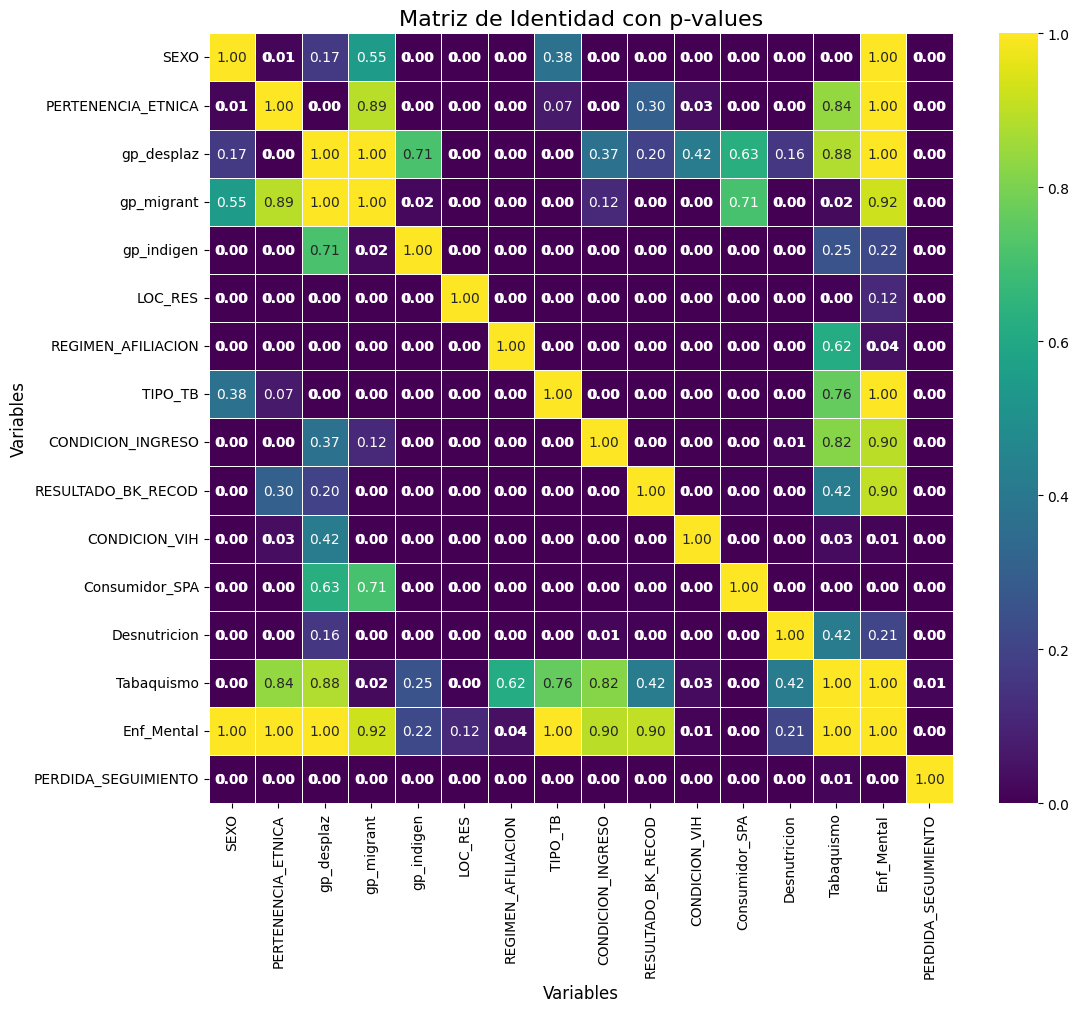

In [ ]:
# prompt: haga un heatmap  de la matriz de identidad utilizando seaborn, agregar titulos de las columnas y las filas y resaltar p value menores o iguales a 0.05

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'matriz_identidad' is already defined from the previous code

# Create a DataFrame for the heatmap
df_heatmap = pd.DataFrame(matriz_identidad)

# Set column and index names
column_names = df_chi.columns.tolist()
df_heatmap.columns = column_names[:16]  # Adjust slicing if needed
df_heatmap.index = column_names[:16]  # Adjust slicing if needed


plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(df_heatmap, annot=True, cmap='viridis', fmt=".2f", vmin=0, vmax=1, linewidths=.5) # Added vmin and vmax for better color scale

# Add title and labels
plt.title('Matriz de Identidad con p-values', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Highlight cells where p-value <= 0.05 (Example)
for i in range(len(df_heatmap)):
    for j in range(len(df_heatmap.columns)):
        if df_heatmap.iloc[i, j] <= 0.05 and i != j:
            plt.text(j + 0.5, i + 0.5, f"{df_heatmap.iloc[i, j]:.2f}", ha='center', va='center', color='white', fontweight='bold')


plt.show()

## **LASSO**

In [ ]:
!pip install celer
from celer import GroupLasso

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.7 MB/s eta 0:00:00


In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get feature names
feature_names = X_train.columns.tolist()

# Create a dictionary mapping feature names to their indices
feature_indices = {name: i for i, name in enumerate(feature_names)}

# Define groups using feature indices instead of names
groups = [[feature_indices[name] for name in group] for group in [
    ['EDAD'],
    ['SEXO_F', 'SEXO_M'],
    ['PERTENENCIA_ETNICA_AFRO', 'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO', 'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL', 'PERTENENCIA_ETNICA_ROOM (GITANO)'],
    ['gp_desplaz_NO', 'gp_desplaz_SI'],
    ['gp_migrant_NO', 'gp_migrant_SI'],
    ['gp_indigen_NO', 'gp_indigen_SI'],
    ['LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO', 'LOC_RES_SUR', 'LOC_RES_Sin Dato'],
    ['REGIMEN_AFILIACION_C', 'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P', 'REGIMEN_AFILIACION_S'],
    ['TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR'],
    ['CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT', 'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF', 'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR'],
    ['RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO', 'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD'],
    ['CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATIVO', 'CONDICION_VIH_POSITIVO'],
    ['Consumidor_SPA_NO', 'Consumidor_SPA_SI'],
    ['Desnutricion_NO', 'Desnutricion_SI'],
    ['Tabaquismo_NO', 'Tabaquismo_SI'],
    ['Enf_Mental_NO', 'Enf_Mental_SI']
]]

# Iterate through different alpha values
for alpha in [0.001, 0.01, 0.1, 1, 10, 50, 100]:
  # Create a GroupLasso model with the current alpha
  model = GroupLasso(groups=groups, alpha=alpha)

  # Fit the model
  model.fit(X_train, y_train)

  # Get the coefficients
  coefficients = model.coef_

  # Identify selected features (non-zero coefficients)
  selected_features = X.columns[coefficients != 0]

  print(f"Selected features for alpha = {alpha}: {selected_features}")
  print("Number of selected features:", len(selected_features))
  print("------------------------------------")


Selected features for alpha = 0.001: Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_RAIZAL', 'PERTENENCIA_ETNICA_ROOM (GITANO)',
       'gp_indigen_NO', 'gp_indigen_SI', 'LOC_RES_CO', 'LOC_RES_FDB',
       'LOC_RES_NORTE', 'LOC_RES_SO', 'LOC_RES_SUR', 'LOC_RES_Sin Dato',
       'REGIMEN_AFILIACION_C', 'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N',
       'REGIMEN_AFILIACION_P', 'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR',
       'TIPO_TB_PULMONAR', 'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATIVO',
       'CONDICION_VIH_POSITIVO', 'Consumidor_SPA_NO', 'Consumidor

In [ ]:
# prompt: OBTENER LAS MEDIDAS DE BIC Y AIC DEL MODELO GroupLasso con valor de  alpha 0.001

import statsmodels.api as sm

# Calculate AIC and BIC using statsmodels
X_train_with_constant = sm.add_constant(X_train)
lasso = GroupLasso(groups=groups, alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)

model_lasso = sm.OLS(y_train, X_train_with_constant).fit()

aic = model_lasso.aic
bic = model_lasso.bic

print(f"AIC for GroupLasso (alpha=0.001): {aic}")
print(f"BIC for GroupLasso (alpha=0.001): {bic}")

AIC for GroupLasso (alpha=0.001): 300.1476381550474
BIC for GroupLasso (alpha=0.001): 533.5153826695916


In [ ]:
import statsmodels.api as sm

# Calculate AIC and BIC using statsmodels
X_train_with_constant = sm.add_constant(X_train)
lasso = GroupLasso(groups=groups, alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)

model_lasso = sm.OLS(y_train, X_train_with_constant).fit()

aic = model_lasso.aic
bic = model_lasso.bic

print(f"AIC for GroupLasso (alpha=0.01): {aic}")
print(f"BIC for GroupLasso (alpha=0.01): {bic}")

AIC for GroupLasso (alpha=0.01): 300.1476381550474
BIC for GroupLasso (alpha=0.01): 533.5153826695916


## **REGRESION LOGISTICA**

In [ ]:
# prompt: Generar un modelo de regresion logistica para reduccion de caracteristicas a partir de df2

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Define X and y
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LogisticRegression model with L1 penalty (for feature selection)
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=1)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Use SelectFromModel to select features based on the logistic regression coefficients
selector = SelectFromModel(logistic_model, prefit=True)

# Transform the training and testing data to keep only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the indices of selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features_logit = X.columns[selected_feature_indices]

print("Selected Features:", selected_features_logit)
print("Number of selected features:", len(selected_features_logit))

# You can now train a new logistic regression model or any other model using X_train_selected and X_test_selected


Selected Features: Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_OTRO', 'gp_desplaz_NO',
       'gp_desplaz_SI', 'gp_migrant_NO', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SUR',
       'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C', 'REGIMEN_AFILIACION_N',
       'REGIMEN_AFILIACION_P', 'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_RTPS',
       'RESULTADO_BK_RECOD_NO REALIZADO', 'RESULTADO_BK_RECOD_POSITIVO',
       'RESULTADO_BK_RECOD_SD', 'CONDICION_VIH_DESCONOCIDO',
       'CONDICION_VIH_NEGATIVO', 'Consumidor_SPA_NO', 'Consumidor_SPA_SI',
       'Desnutricion_SI', 'Tabaquismo_NO', 'Enf_Mental_NO'],
      dtype='object')
Number of selected features: 31


In [ ]:
# prompt: OBTENER LAS MEDIDAS DE BIC Y AIC DEL MODELO  logistic_model

import statsmodels.api as sm

# Add a constant term to the predictor variables
X_train_with_constant = sm.add_constant(X_train_selected)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_constant).fit()

# Get the AIC and BIC
aic = logit_model.aic
bic = logit_model.bic

print("AIC:", aic)
print("BIC:", bic)


Optimization terminated successfully.
         Current function value: 0.224595
         Iterations 8
AIC: 3232.2270363071757
BIC: 3424.4122376720943


## **LOGIT + FORWARD**

In [ ]:
# prompt: generar un modelo de regresion logistica y utilizando forward reduccir las variables de df2 forma iterativa hasta obtener las caracteristicas con alfa  mayor o igual a 0.05

import statsmodels.api as sm
import pandas as pd
import numpy as np

def forward_regression(X, y, threshold_in, correlation_threshold=0.9):
  """
  Perform forward regression to select features based on p-values,
  handling multicollinearity.

  Args:
    X: The feature matrix (pandas DataFrame).
    y: The target variable (pandas Series).
    threshold_in: The p-value threshold for including a feature.
    correlation_threshold: The correlation threshold to consider features
                            as highly correlated.

  Returns:
    A list of selected features.
  """

  initial_features = []
  included = list(initial_features)
  while True:
    changed = False
    excluded = list(set(X.columns) - set(included))
    new_pval = pd.Series(index=excluded)
    for new_column in excluded:
      # Check for high correlation with existing features
      if included:  # Check if 'included' is not empty
          correlations = X[included + [new_column]].corr().abs()
          # Get correlations between 'new_column' and 'included' features
          new_column_correlations = correlations[new_column].drop(new_column, errors='ignore')
          # If any correlation exceeds the threshold, skip this feature
          if (new_column_correlations > correlation_threshold).any():
              print(f"Skipping {new_column} due to high correlation with existing features.")
              continue  # Skip to the next feature

      # If no high correlation, proceed with model fitting
      try:
          model_forward = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
          new_pval[new_column] = model_forward.pvalues[new_column]
      except np.linalg.LinAlgError:
          print(f"Skipping {new_column} due to singularity issue.")
          continue  # Skip to the next feature

    # If all remaining features have p-values above the threshold or cause singularity:
    if new_pval.empty or (new_pval >= threshold_in).all():
      break

    best_pval = new_pval.min()
    if best_pval < threshold_in:
      best_feature = new_pval.idxmin()
      included.append(best_feature)
      changed = True
      print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
    if not changed:
      break
  return included

# Define X and y
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Perform forward regression with a threshold of 0.05 and correlation threshold of 0.9
selected_features_forward = forward_regression(X, y, threshold_in=0.05, correlation_threshold=0.9)

print("\nSelected Features:", selected_features_forward)
print("Number of selected features:", len(selected_features_forward))


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  gp_indigen_SI                  with p-value 2.1496e-121
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  EDAD                           with p-value 8.45743e-26
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  CONDICION_INGRESO_NUEVO        with p-value 1.80154e-18
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  REGIMEN_AFILIACION_C           with p-value 3.63337e-12
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  REGIMEN_AFILIACION_N           with p-value 6.8667e-07
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  LOC_RES_FDB                    with p-value 6.50641e-05
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  Consumidor_SPA_NO              with p-value 0.000128697
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  REGIMEN_AFILIACION_S           with p-value 0.00220328
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  CONDICION_VIH_DESCONOCIDO      with p-value 0.00368892
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  LOC_RES_SUR                    with p-value 0.00517432
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  CONDICION_INGRESO_RTPS         with p-value 0.00970616
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  gp_desplaz_SI                  with p-value 0.0198906
Skipping gp_desplaz_NO due to high correlation with existing features.
Skipping gp_indigen_NO due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  Enf_Mental_NO                  with p-value 0.031259
Skipping gp_desplaz_NO due to high correlation with existing features.
Skipping gp_indigen_NO due to high correlation with existing features.
Skipping Enf_Mental_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add  SEXO_M                         with p-value 0.0478812
Skipping gp_desplaz_NO due to high correlation with existing features.
Skipping gp_indigen_NO due to high correlation with existing features.
Skipping Enf_Mental_SI due to high correlation with existing features.
Skipping SEXO_F due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skipping Consumidor_SPA_SI due to high correlation with existing features.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Selected Features: ['gp_indigen_SI', 'EDAD', 'CONDICION_INGRESO_NUEVO', 'REGIMEN_AFILIACION_C', 'REGIMEN_AFILIACION_N', 'LOC_RES_FDB', 'Consumidor_SPA_NO', 'REGIMEN_AFILIACION_S', 'CONDICION_VIH_DESCONOCIDO', 'LOC_RES_SUR', 'CONDICION_INGRESO_RTPS', 'gp_desplaz_SI', 'Enf_Mental_NO', 'SEXO_M']
Number of selected features: 14


In [ ]:
# prompt: OBTENER LAS MEDIDAS DE BIC Y AIC DEL MODELO forward_regression

import statsmodels.api as sm

# Define X and y using the selected features
X_selected = df2[selected_features_forward]
y = df2['PERDIDA_SEGUIMIENTO_N']

# Fit the logistic regression model using statsmodels
model_forward = sm.Logit(y, sm.add_constant(X_selected)).fit()

# Print the AIC and BIC values
print(f"AIC: {model_forward.aic}")
print(f"BIC: {model_forward.bic}")


Optimization terminated successfully.
         Current function value: 0.222894
         Iterations 7
AIC: 4533.358602301469
BIC: 4641.665932846889


## **LOGIT + BACKWARD**

In [ ]:
# prompt: CALCULAR BIC Y AIC DEL MODELO backward_regression

def backward_regression(X, y, threshold_out):
  """
  Performs backward regression to select features based on p-values,
  handling multicollinearity.

  Args:
    X: The feature matrix (pandas DataFrame).
    y: The target variable (pandas Series).
    threshold_out: The p-value threshold for excluding a feature.

  Returns:
    A list of selected features.
  """

  included = list(X.columns)
  while True:
    changed = False
    try:
      # Try fitting the model
      model_backward = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
      # Use model.pvalues to get p-values for each feature
      pvalues = model_backward.pvalues.iloc[1:]  # Exclude the constant term
      worst_pval = pvalues.max()  # Find the highest p-value
      if worst_pval > threshold_out:
        changed = True
        worst_feature = pvalues.idxmax()
        included.remove(worst_feature)
        print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
      if not changed:
        break
    except np.linalg.LinAlgError:
      # Handle singularity issue by dropping the feature causing the issue
      # Get the features causing perfect multicollinearity
      # using variance_inflation_factor (VIF)
      from statsmodels.stats.outliers_influence import variance_inflation_factor

      vif = pd.DataFrame()
      vif["VIF Factor"] = [variance_inflation_factor(X[included].values, i) for i in range(X[included].shape[1])]
      vif["features"] = X[included].columns

      # Drop the feature with the highest VIF
      worst_feature = vif.loc[vif["VIF Factor"].idxmax()]['features']
      included.remove(worst_feature)
      print(f"Dropping {worst_feature} due to high VIF.")
      changed = True  # Mark as changed to continue the loop

  return included

# Define X and y
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Perform backward regression with a threshold of 0.05
selected_features_backward = backward_regression(X, y, threshold_out=0.05)

print("\nSelected Features:", selected_features_backward)
print("Number of selected features:", len(selected_features_backward))

# Now, you can proceed with calculating AIC and BIC using the updated selected_features_backward
X_selected = df2[selected_features_backward]
model_backward = sm.Logit(y, sm.add_constant(X_selected)).fit()

# Print the AIC and BIC values
print(f"AIC: {model_backward.aic}")
print(f"BIC: {model_backward.bic}")

Dropping SEXO_F due to high VIF.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop gp_desplaz_SI                  with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop Consumidor_SPA_SI              with p-value 1.0
Dropping PERTENENCIA_ETNICA_AFRO due to high VIF.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop RESULTADO_BK_RECOD_NEGATIVO    with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop gp_migrant_SI                  with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop LOC_RES_NORTE                  with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop TIPO_TB_PULMONAR               with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop CONDICION_VIH_DESCONOCIDO      with p-value 1.0
Dropping gp_indigen_NO due to high VIF.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop REGIMEN_AFILIACION_C           with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop Tabaquismo_SI                  with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop CONDICION_INGRESO_REMITIDO     with p-value 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop Enf_Mental_SI                  with p-value 0.999997


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop Desnutricion_NO                with p-value 0.999999


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop CONDICION_INGRESO_NUEVO        with p-value 0.999998


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Drop PERTENENCIA_ETNICA_PALENQUERO  with p-value 0.999308
Drop PERTENENCIA_ETNICA_RAIZAL      with p-value 0.994627
Drop Desnutricion_SI                with p-value 0.886176
Drop PERTENENCIA_ETNICA_OTRO        with p-value 0.864703
Drop RESULTADO_BK_RECOD_SD          with p-value 0.785818
Drop PERTENENCIA_ETNICA_ROOM (GITANO) with p-value 0.692566
Drop TIPO_TB_EXTRAPULMONAR          with p-value 0.452338
Drop REGIMEN_AFILIACION_P           with p-value 0.445685
Drop LOC_RES_SO                     with p-value 0.400581
Drop REGIMEN_AFILIACION_E           with p-value 0.389439
Drop gp_migrant_NO                  with p-value 0.277252
Drop PERTENENCIA_ETNICA_INDIGENA    with p-value 0.226825
Drop LOC_RES_CO                     with p-value 0.248251
Drop RESULTADO_BK_RECOD_NO REALIZADO with p-value 0.138115
Drop SEXO_M                         with p-value 0.0995832
Drop LOC_RES_Sin Dato               with p-value 0.0826612
Drop Tabaquismo_NO                  with p-value 0.0794658
Drop RES

## **LOGIT + STEPWISE**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_classification

# **Original X and y from df2 are preserved**
X_original = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y_original = df2['PERDIDA_SEGUIMIENTO_N']

# Simulate a DataFrame (using original dimensions as a guide)
X_simulated, y_simulated = make_classification(n_samples=X_original.shape[0], n_features=X_original.shape[1], random_state=42)
df_simulated = pd.DataFrame(X_simulated, columns=[f'feature_{i}' for i in range(X_original.shape[1])])
df_simulated['target'] = y_simulated

def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.05):
    """
    Performs stepwise selection (forward selection followed by backward elimination)
    to select features based on p-values.
    """
    initial_features = X.columns.tolist()
    best_features = []

    while len(initial_features) > 0:
        changed = False

        # Forward selection
        for feature in initial_features:
            try:
                # **Added try-except block to handle LinAlgError**
                model_stepwise = sm.Logit(y, sm.add_constant(X[best_features + [feature]])).fit(disp=0)
                p_value = model_stepwise.pvalues[feature]
                if p_value < threshold_in:
                    best_features.append(feature)
                    changed = True
            except np.linalg.LinAlgError:
                # **If singular matrix, skip the feature**
                print(f"Skipping {feature} due to singularity issue.")
                continue  # Skip to the next feature

        if not changed:
            break

        # Backward elimination
        try:
            # **Added try-except block to handle LinAlgError**
            model_stepwise = sm.Logit(y, sm.add_constant(X[best_features])).fit(disp=0)
            p_values = model_stepwise.pvalues.iloc[1:]  # Exclude the constant
            max_p_value = p_values.max()

            if max_p_value >= threshold_out:
                feature_to_remove = p_values.idxmax()
                best_features.remove(feature_to_remove)
                changed = True

        except np.linalg.LinAlgError:
            # **If singular matrix, break the loop**
            print("Singularity issue during backward elimination. Stopping.")
            break

        if not changed:
            break

        initial_features = [f for f in initial_features if f not in best_features]

    return best_features

# **Use the simulated data for stepwise selection**
X = df_simulated.drop('target', axis=1)
y = df_simulated['target']

# Llamar a la función de selección stepwise
selected_features_stepwise = stepwise_selection(X, y)

print("Características seleccionadas:", selected_features_stepwise)

Características seleccionadas: ['feature_9', 'feature_24', 'feature_5']


In [ ]:
# prompt: OBTENER LAS MEDIDAS DE BIC Y AIC DEL MODELO stepwise_selectio

# Assuming you have the selected features from stepwise_selection
selected_features = stepwise_selection(X, y)

# Fit the model with selected features
X_selected = X[selected_features_stepwise]
model_stepwise = sm.Logit(y, sm.add_constant(X_selected)).fit(disp=0)

# Get BIC and AIC
bic = model_stepwise.bic
aic = model_stepwise.aic

print(f"BIC: {bic}")
print(f"AIC: {aic}")


BIC: 3123.040953768993
AIC: 3094.158998956881


## **LOGIT + OLS (Ordinary Least Squares)**

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Crear el modelo de regresión logística
def logistic_regression_with_ols(df, target, alpha=0.05):
    # Copia del dataframe original
    df2 = df.copy()

    # Definir la variable dependiente (objetivo) y las independientes (features)
    X = df2.drop(columns=['PERDIDA_SEGUIMIENTO_N'])
    y = df2['PERDIDA_SEGUIMIENTO_N']

    # Agregar constante para el intercepto en OLS
    X_ols = sm.add_constant(X)

    # Iterar hasta que todas las variables tengan p-value <= alpha
    while True:
        # Aplicar OLS
        ols_model = sm.OLS(y, X_ols).fit()
        p_values = ols_model.pvalues

        # Verificar si hay alguna variable con p-value mayor al umbral
        max_p_value = p_values.max()

        if max_p_value > alpha:
            # Obtener la variable con el mayor p-value
            feature_to_remove = p_values.idxmax()

            # Eliminar la característica con el p-value más alto
            if feature_to_remove == 'const':
                print("El intercepto tiene un p-valor alto, pero no lo eliminaremos.")
                break
            else:
                X_ols = X_ols.drop(columns=[feature_to_remove])
                print(f"Eliminando variable '{feature_to_remove}' con p-valor {max_p_value:.4f}")
        else:
            # Si todas las variables tienen p-value <= alpha, terminar el proceso
            break

    # Después de la selección de características, ajustar el modelo de regresión logística final
    final_features = X_ols.columns.drop('const')
    X_final = df2[final_features]

    log_reg = LogisticRegression()
    log_reg.fit(X_final, y)

    return log_reg, ols_model.summary(), final_features

# Ejemplo de uso:
# df2 es el DataFrame, y 'target_column' es el nombre de la columna objetivo.
logistic_model, ols_summary, selected_features = logistic_regression_with_ols(df2, 'PERDIDA_SEGUIMIENTO')

# Mostrar las características seleccionadas
print(f"Características finales: {selected_features}")
print(ols_summary)

Eliminando variable 'TIPO_TB_PULMONAR' con p-valor 0.8381
Eliminando variable 'SEXO_M' con p-valor 0.8028
Eliminando variable 'REGIMEN_AFILIACION_N' con p-valor 0.9059
Eliminando variable 'RESULTADO_BK_RECOD_POSITIVO' con p-valor 0.8921
Eliminando variable 'CONDICION_INGRESO_REMITIDO' con p-valor 0.9958
Eliminando variable 'CONDICION_INGRESO_NUEVO' con p-valor 0.9369
Eliminando variable 'CONDICION_VIH_DESCONOCIDO' con p-valor 0.8385
Eliminando variable 'PERTENENCIA_ETNICA_PALENQUERO' con p-valor 0.7679
Eliminando variable 'gp_indigen_NO' con p-valor 0.9083
Eliminando variable 'Enf_Mental_NO' con p-valor 0.8699
Eliminando variable 'LOC_RES_Sin Dato' con p-valor 0.9211
El intercepto tiene un p-valor alto, pero no lo eliminaremos.
Características finales: Index(['EDAD', 'SEXO_F', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_RAIZAL', 'PERTENENCIA_ETNICA_ROOM (GITANO)',
       'gp_desplaz_NO', 'gp_desplaz_SI', 'gp_mig

## **Recursive Feature Elimination (RFE)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Suponiendo que tienes el dataframe df2 con las características X y la variable objetivo y
X = df2.drop(columns='PERDIDA_SEGUIMIENTO_N')
y = df2['PERDIDA_SEGUIMIENTO_N']

# Modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)

# Recursive Feature Elimination (RFE)
rfe = RFE(logreg, n_features_to_select=15)  # Se selecciona 1 característica a la vez
rfe = rfe.fit(X, y)

# Obtener las características seleccionadas
selected_features_RFE = X.columns[rfe.support_]

# Ajustar el modelo con las características seleccionadas
X_rfe = X[selected_features_RFE]
X_rfe = sm.add_constant(X_rfe)  # Añadir la constante para el intercepto

# Modelo de regresión logística con las características seleccionadas
model_RFE = sm.Logit(y, X_rfe).fit()

# Filtrar características con p-values > 0.05 (Changed from >= to >)
while True:
    p_values = model_RFE.pvalues
    # Check if any p-value is greater than 0.05
    if any(p > 0.05 for p in p_values.drop(index='const', errors='ignore')):  # Exclude the constant
        # Eliminar la característica con el mayor p-value (excluding the constant)
        max_p_value_feature = p_values.drop(index='const', errors='ignore').idxmax()  # Exclude the constant
        X_rfe = X_rfe.drop(columns=[max_p_value_feature])
        model_RFE = sm.Logit(y, X_rfe).fit()
    else:
        break  # Exit the loop if all p-values are <= 0.05


print("Las características seleccionadas con p-value <= 0.05 son:") # Changed message to reflect the correct condition
print(X_rfe.columns)

Optimization terminated successfully.
         Current function value: 0.223307
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.223363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.223363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.223489
         Iterations 7
Las características seleccionadas con p-value <= 0.05 son:
Index(['const', 'EDAD', 'gp_desplaz_NO', 'gp_indigen_SI', 'LOC_RES_FDB',
       'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_S',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_RTPS',
       'CONDICION_VIH_DESCONOCIDO', 'Consumidor_SPA_NO', 'Enf_Mental_NO',
       'Enf_Mental_SI'],
      dtype='object')


In [ ]:
# prompt: OBTENER LAS MEDIDAS DE BIC Y AIC DEL MODELO MODEL_RFE

# Calculate BIC and AIC for the model_RFE
bic_rfe = model_RFE.bic
aic_rfe = model_RFE.aic

print(f"BIC (model_RFE): {bic_rfe}")
print(f"AIC (model_RFE): {aic_rfe}")


BIC (model_RFE): 4635.229190780543
AIC (model_RFE): 4541.362837641179
